In [7]:
import opendatasets as od
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt 
import seaborn as sns 
%matplotlib inline 
from importlib import reload
plt=reload(plt)

In [8]:
import os
od.download('https://www.kaggle.com/stefanoleone992/fifa-21-complete-player-dataset')

Skipping, found downloaded files in ".\fifa-21-complete-player-dataset" (use force=True to force download)


In [9]:
os.listdir('fifa-21-complete-player-dataset')

['Career Mode player datasets - FIFA 15-21.xlsx',
 'players_15.csv',
 'players_16.csv',
 'players_17.csv',
 'players_18.csv',
 'players_19.csv',
 'players_20.csv',
 'players_21.csv',
 'teams_and_leagues.csv']

In [10]:
players_raw_20_df=pd.read_csv('fifa-21-complete-player-dataset/players_20.csv')

In [15]:
players_df=players_raw_20_df[selected_columns].copy()

In [17]:
players_df.columns

Index(['short_name', 'age', 'dob', 'height_cm', 'weight_kg', 'nationality',
       'player_positions', 'preferred_foot', 'overall', 'potential',
       'player_tags', 'club_name', 'league_name', 'value_eur', 'wage_eur',
       'release_clause_eur', 'pace', 'power_stamina', 'work_rate'],
      dtype='object')

In [18]:
teams_leagues=pd.read_csv('fifa-21-complete-player-dataset/teams_and_leagues.csv')
teams_leagues

,url,league_name
0,241,Spain Primera Division
1,11,English Premier League
2,5,English Premier League
3,243,Spain Primera Division
4,1,English Premier League
...,...,...
1075,326,Turkish Süper Lig
1076,190,Italian Serie A
1077,448,Spain Primera Division
1078,8,English League Championship


In [26]:
players_raw_20_df.columns.values

array(['sofifa_id', 'player_url', 'short_name', 'long_name', 'age', 'dob',
       'height_cm', 'weight_kg', 'nationality', 'club_name',
       'league_name', 'league_rank', 'overall', 'potential', 'value_eur',
       'wage_eur', 'player_positions', 'preferred_foot',
       'international_reputation', 'weak_foot', 'skill_moves',
       'work_rate', 'body_type', 'real_face', 'release_clause_eur',
       'player_tags', 'team_position', 'team_jersey_number',
       'loaned_from', 'joined', 'contract_valid_until', 'nation_position',
       'nation_jersey_number', 'pace', 'shooting', 'passing', 'dribbling',
       'defending', 'physic', 'gk_diving', 'gk_handling', 'gk_kicking',
       'gk_reflexes', 'gk_speed', 'gk_positioning', 'player_traits',
       'attacking_crossing', 'attacking_finishing',
       'attacking_heading_accuracy', 'attacking_short_passing',
       'attacking_volleys', 'skill_dribbling', 'skill_curve',
       'skill_fk_accuracy', 'skill_long_passing', 'skill_ball_control',


## Data Cleaning and Preparation 

Subsetting columns with relevant columns

In [13]:
selected_columns=[
    # Demographics 
    'short_name',
    'age',
    'dob',
    'height_cm',
    'weight_kg',
    'nationality',
    'player_positions', 
    'preferred_foot',
    # abilities
    'overall',
    'potential',
    'player_tags',
    # Club and league
    'club_name',
    'league_name', 
    # Value
    'value_eur',
    'wage_eur',
    'release_clause_eur',
    # skills
    'pace',
    'power_stamina',
    'work_rate'
]

In [14]:
len(selected_columns)

19

In [19]:
players_df.info()
# dob should be converted to a time series

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18483 entries, 0 to 18482
Data columns (total 19 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   short_name          18483 non-null  object 
 1   age                 18483 non-null  int64  
 2   dob                 18483 non-null  object 
 3   height_cm           18483 non-null  int64  
 4   weight_kg           18483 non-null  int64  
 5   nationality         18483 non-null  object 
 6   player_positions    18483 non-null  object 
 7   preferred_foot      18483 non-null  object 
 8   overall             18483 non-null  int64  
 9   potential           18483 non-null  int64  
 10  player_tags         1512 non-null   object 
 11  club_name           18243 non-null  object 
 12  league_name         18243 non-null  object 
 13  value_eur           18483 non-null  int64  
 14  wage_eur            18483 non-null  int64  
 15  release_clause_eur  17185 non-null  float64
 16  pace

In [20]:
# calculating null percentages of columns we have for our dataset
null_percent= players_df.isna().sum().sort_values(ascending=False)/len(players_df) *100
null_percent

player_tags           91.819510
pace                  11.150787
release_clause_eur     7.022669
league_name            1.298491
club_name              1.298491
short_name             0.000000
power_stamina          0.000000
wage_eur               0.000000
value_eur              0.000000
potential              0.000000
age                    0.000000
overall                0.000000
preferred_foot         0.000000
player_positions       0.000000
nationality            0.000000
weight_kg              0.000000
height_cm              0.000000
dob                    0.000000
work_rate              0.000000
dtype: float64

I think it's not possible for every player to have specific tags assigned, I think tags are attributted to players of good quality


In [22]:
players_df.rename(columns= {'short_name':'name'}, inplace= True)
players_df['dob']=pd.to_datetime(players_df['dob'])

In [23]:
players_df.describe() # observing datasets for extreme values 

,age,height_cm,weight_kg,overall,potential,value_eur,wage_eur,release_clause_eur,pace,power_stamina
count,18483.000000,18483.000000,18483.000000,18483.000000,18483.000000,1.848300e+04,18483.000000,1.718500e+04,16422.000000,18483.000000
mean,25.283071,181.348212,75.259049,66.198885,71.500893,2.461422e+06,9563.084997,4.695156e+06,67.693216,62.862414
std,4.656790,6.760648,7.053023,6.950927,6.140787,5.557379e+06,21035.987405,1.097328e+07,11.293819,16.021863
min,16.000000,155.000000,50.000000,48.000000,49.000000,0.000000e+00,0.000000,1.300000e+04,24.000000,12.000000
25%,22.000000,177.000000,70.000000,62.000000,67.000000,3.250000e+05,2000.000000,5.510000e+05,61.000000,56.000000
50%,25.000000,181.000000,75.000000,66.000000,71.000000,7.000000e+05,3000.000000,1.200000e+06,69.000000,66.000000
75%,29.000000,186.000000,80.000000,71.000000,75.000000,2.000000e+06,9000.000000,3.600000e+06,75.000000,74.000000
max,42.000000,205.000000,110.000000,94.000000,95.000000,1.055000e+08,575000.000000,1.958000e+08,96.000000,97.000000


#### Exploratory Analysis and Visualisation

In [24]:
import seaborn as sns
import matplotlib
import matplotlib.pyplot as plt 
%matplotlib inline 

sns.set_style('darkgrid')
matplotlib.rcParams['font.size']=14 
matplotlib.rcParams['figure.figsize']=(9,5)
matplotlib.rcParams['figure.facecolor']= '#00000000'

In [25]:
players_df_merged.drop(['url'], axis=1,inplace=True) # dropping the url column 

NameError: name 'players_df_merged' is not defined

##### Relationship between a player's wage and Market Value?

C:\Users\HP\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


Text(0.5, 1.0, 'Relationship between market value and wage')

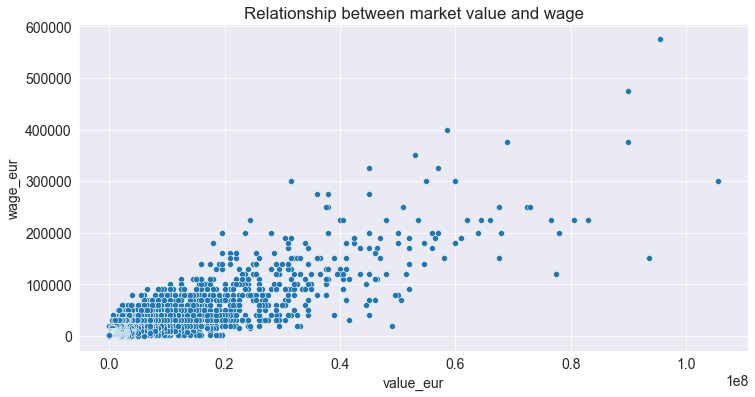

In [27]:
plt.figure(figsize=(12,6))
sns.scatterplot(players_df.value_eur, players_df.wage_eur);
plt.title('Relationship between market value and wage')


Appears there's a positive correlation between players wages and their perceived market value. As wages increase the market values does same.

#### Distribution of Age in the dataset?

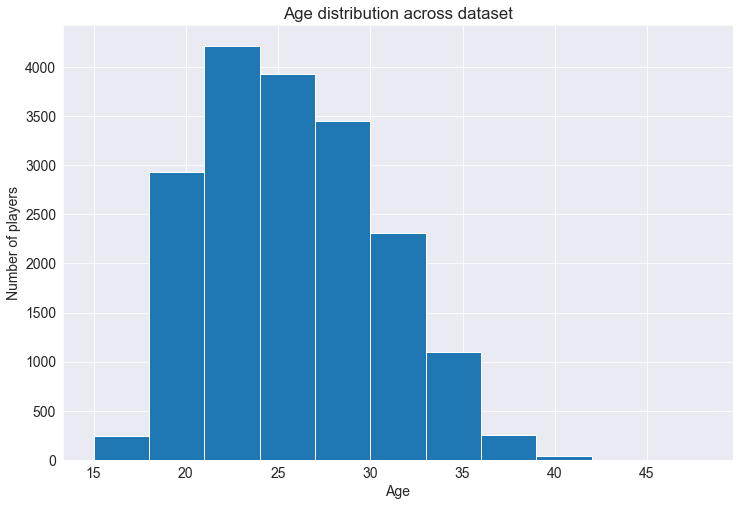

In [28]:
plt.figure(figsize=(12,8))
plt.title('Age distribution across dataset')
plt.xlabel('Age')
plt.ylabel('Number of players')
plt.hist(players_df.age, bins=np.arange(15,50,3));

Appears age 22-30 is the peak for footballers, the drop in players above 30 years of age can be attributed to retirement starting for majority of players at that age. It declines precipitously as the age increases above 30.  

### Add a new coulum Continent which contains nationality corresponding to their various continents

In [29]:
# checking for unique values in nationality 
players_df.nationality.unique()

array(['Argentina', 'Portugal', 'Brazil', 'Slovenia', 'Belgium',
       'Germany', 'Netherlands', 'Croatia', 'Egypt', 'France', 'Senegal',
       'England', 'Spain', 'Italy', 'Uruguay', 'Poland', 'Denmark',
       'Gabon', 'Korea Republic', 'Costa Rica', 'Slovakia',
       'Bosnia Herzegovina', 'Serbia', 'Scotland', 'Hungary',
       'Switzerland', 'Greece', 'Austria', 'Morocco', 'Sweden', 'Wales',
       'Colombia', 'Czech Republic', 'Chile', 'Algeria', 'Ivory Coast',
       'Togo', 'Norway', 'Mexico', 'Iceland', 'Finland', 'Jamaica',
       'Albania', 'Guinea', 'Cameroon', 'Ghana', 'Montenegro', 'Ukraine',
       'Russia', 'DR Congo', 'Central African Republic', 'Venezuela',
       'Nigeria', 'Armenia', 'Israel', 'Ecuador', 'Paraguay', 'Australia',
       'Turkey', 'Romania', 'Japan', 'Mali', 'United States', 'Kosovo',
       'Dominican Republic', 'Tanzania', 'China PR', 'Northern Ireland',
       'Republic of Ireland', 'Tunisia', 'Cape Verde', 'North Macedonia',
       'Burkina Faso

In [30]:
## show the distribution of continents across the dataset
groups={
    'Asia':('Korea Republic','Japan','China PR','Syria', 'Iran', 'Philippines','Iraq', 'Uzbekistan','Saudi Arabia', 
            'Bahrain', 'Thailand', 'United Arab Emirates','Korea DPR', 'Azerbaijan','Jordan','Hong Kong', 
            'Chinese Taipei', 'Belize', 'Palestine', 'Guam', 'Lebanon','Afghanistan','India','Macau', 'Vietnam'),
    'Europe':('Portugal','Slovenia','Belgium','Germany', 'Netherlands', 'Croatia','France', 'England', 'Spain', 
             'Italy','Poland', 'Denmark', 'Slovakia','Bosnia Herzegovina', 'Serbia', 'Scotland', 'Hungary',
              'Switzerland', 'Greece', 'Austria','Sweden', 'Wales','Czech Republic','Norway', 'Iceland', 'Finland', 
              'Albania', 'Montenegro', 'Ukraine', 'Russia', 'Armenia', 'Israel', 'Turkey', 'Romania', 'Kosovo', 
             'Northern Ireland', 'Republic of Ireland','Georgia','Bulgaria', 'Cyprus', 'Moldova','Lithuania',  
             'Luxembourg','Latvia', 'Faroe Islands', 'Liechtenstein','Gibraltar','Malta'), 
    'Africa':('Egypt','Senegal',  'Gabon','Morocco','Algeria', 'Ivory Coast','Togo','Guinea', 'Cameroon', 'Ghana',
              'DR Congo', 'Central African Republic','Nigeria', 'Mali','Tanzania', 'Tunisia', 'Cape Verde',
              'Burkina Faso', 'Kenya', 'Angola', 'South Africa', 'Gambia', 'Equatorial Guinea', 'Zimbabwe','Benin', 
              'Mozambique','Guinea Bissau','Madagascar', 'Sierra Leone', 'Zambia', 'Congo','Comoros','Chad','Libya',
              'Eritrea','São Tomé & Príncipe', 'Burundi', 'Liberia','Mauritania', 'Namibia','Rwanda', 'Uganda',
              'Mauritius','Sudan', 'Ethiopia', 'Niger', 'Malawi', 'South Sudan'),
    'South America':('Argentina', 'Brazil','Uruguay','Colombia', 'Chile', 'Venezuela','Ecuador', 'Paraguay', 'Peru',
                     'Bolivia'), 
    'North America':('Mexico', 'Jamaica','United States','Canada','Honduras', 'Cuba','Curacao', 'Dominican Republic',
                     'Panama','Saint Kitts and Nevis', 'Trinidad & Tobago','El Salvador', 'Montserrat',
                     'Puerto Rico', 'Bermuda','Antigua & Barbuda','Guyana','Haiti', 'Belize', 'Suriname', 'Guatemala', 
                     'Grenada', 'Saint Lucia','Barbados','Costa Rica'),
    'Oceania':('New Zealand','Australia','New Caledonia')
}

pd_series=pd.Series(players_df.nationality) # create series for the nationality  column

from typing import Any

def membermap(s: pd.Series, groups: dict, 
                  fillvalue: Any=-1)->pd.Series:
    # reverse & expand the dictionary Key-value pairs
    groups= {x:k for k, v in groups.items() for x in v}
    return s.map(groups).fillna(fillvalue)

players_df['Continent']=membermap(pd_series, groups, fillvalue='Other')

In [31]:
Continent_count=players_df['Continent'].value_counts()

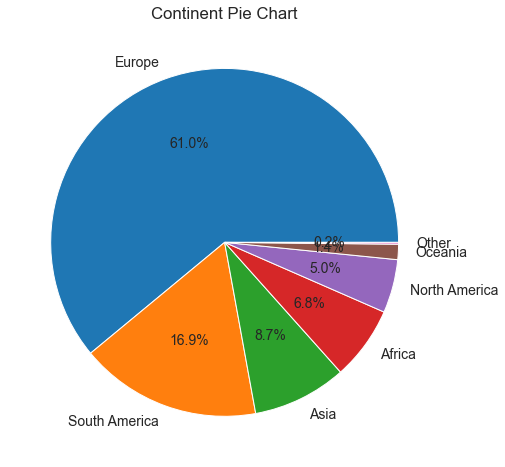

In [32]:
plt.figure(figsize=(14,8))
plt.title('Continent Pie Chart')
plt.pie(Continent_count,labels=Continent_count.index,autopct='%1.1f%%');

Players with European descent are the largest comsidering top 5 leagues- EPL, Serie A, Bundesliga, Laliga, Ligue 1- are from Europe. The Champions league also is one the biggest competition in the world and it's notebaly hosted among European teams. 

South America are next, I would infer this is due to Brazil, Argentina and some South America teams who are known to produce great players for European teams. European teams tend to scout for young players with great potential in South America. You can also see the performance of South America teams during the FIFA world cup. 

#### Compare and anlayze result of the survey of different Age group.

In [35]:
bins=[15,20,25,30,34,50]
labels=['Youngster', 'Gathering experience', 'Prime Players', 'Experienced','Senior Men']
players_df['Age group']=pd.cut(players_df['age'],bins=bins, labels=labels, right=False)

Text(0.5, 1.0, 'Age group count')

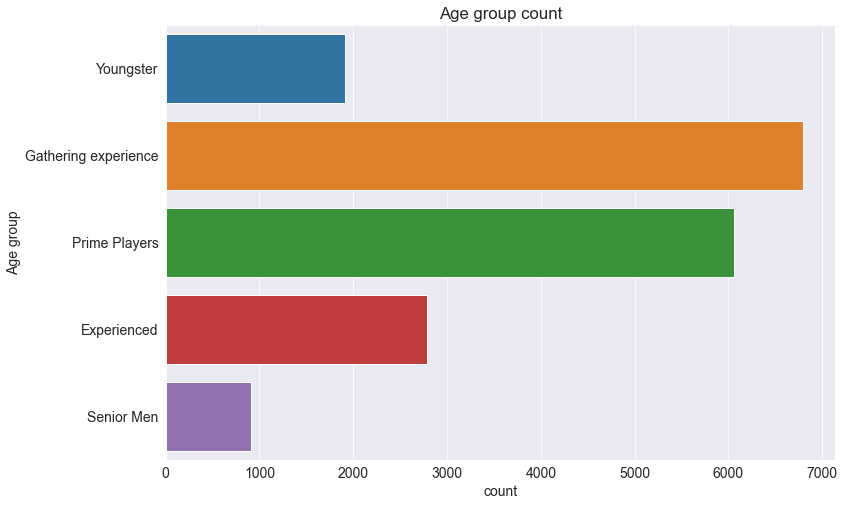

In [39]:
plt.figure(figsize=(12,8))
sns.countplot(y=players_df['Age group']);
plt.title('Age group count')

#### Provide the count for positions for the players

In [49]:
players_df.player_positions.value_counts()

CB              2343
GK              2061
ST              1831
CM               795
CDM, CM          742
                ... 
RM, LB             1
LB, CDM, LWB       1
CDM, RM, CM        1
CF, CM, LB         1
RM, ST, CM         1
Name: player_positions, Length: 649, dtype: int64

In [58]:
# let's split the column containing a list of values into a dataframe with one column for each possible option 

def split_multicolumn(col_series):
    result_df=col_series.to_frame() # converting a series to a dataframe
    options=[] # create a list
    # Iterate over the column
    for idx, value in col_series[col_series.notnull()].iteritems():
        # break each value into list of options 
        for option in value.split(', '):
            # add the option as a column to result
            if not option in result_df.columns:
                options.append(option)
                result_df[option]= False
            # Mark the value in the option column as True
            result_df.at[idx, option]= True 
    return result_df[options]

In [59]:
positions=split_multicolumn(players_df.player_positions)

In [61]:
positions

,RW,CF,ST,LW,CAM,GK,CM,CB,CDM,LM,LB,RB,RM,LWB,RWB
0,True,True,True,False,False,False,False,False,False,False,False,False,False,False,False
1,False,False,True,True,False,False,False,False,False,False,False,False,False,False,False
2,False,False,False,True,True,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False
4,False,True,False,True,False,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
18478,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False
18479,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False
18480,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False
18481,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False


In [60]:
positions_totals=positions.sum().sort_values(ascending=False)
positions_totals

CM     3875
CB     3778
ST     3293
CDM    2761
LM     2434
RM     2342
CAM    2209
GK     2061
LB     2033
RB     2027
RW      992
LW      989
CF      389
LWB     321
RWB     302
dtype: int64

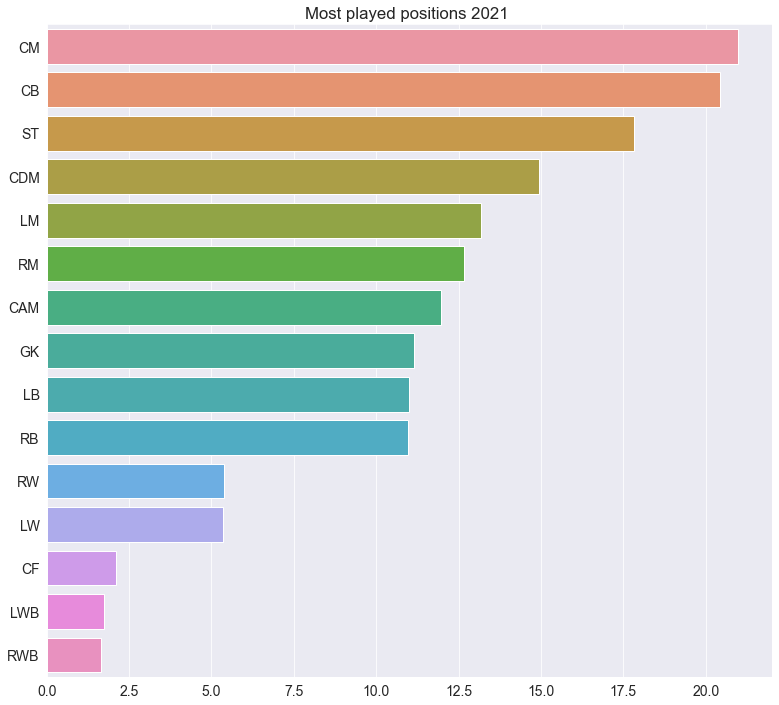

In [63]:
# Visualizing
positions_percent=positions.mean().sort_values(ascending=False)*100
plt.figure(figsize=(13,12))
sns.barplot(x=positions_percent, y=positions_percent.index)
plt.title('Most played positions 2021 ');

##### ASKING TRANSFER AND SCOUTING QUESTIONS ABOUT OUR DATASET 

In [69]:
# Draft a list a goalkeepers with a potential of less than 88, not more than 23 years, cheap wage and transfer value

trf_target_gk=players_df.loc[(players_df['player_positions']=='GK')&(players_df['potential']<=88) & (players_df['age']<=23)&
                                                       (players_df['value_eur']<=15000000)]
trf_target_gk.sort_values('potential', ascending=False).head(15)

,name,age,dob,height_cm,weight_kg,nationality,player_positions,preferred_foot,overall,potential,...,club_name,league_name,value_eur,wage_eur,release_clause_eur,pace,power_stamina,work_rate,Continent,Age group
1259,A. Lunin,20,1999-02-11,191,80,Ukraine,GK,Right,76,88,...,Real Valladolid CF,Spain Primera Division,11000000,10000,NaN,NaN,32,Medium/Medium,Europe,Gathering experience
995,E. Audero,22,1997-01-18,192,83,Italy,GK,Right,77,87,...,Sampdoria,Italian Serie A,11500000,20000,21900000.0,NaN,25,Medium/Medium,Europe,Gathering experience
2655,W. Faríñez,21,1998-02-15,181,81,Venezuela,GK,Right,73,87,...,Millonarios FC,Colombian Liga Postobón,7500000,3000,14800000.0,NaN,39,Medium/Medium,South America,Gathering experience
1618,I. Radu,22,1997-05-28,188,78,Romania,GK,Right,75,87,...,Genoa,Italian Serie A,9500000,10000,NaN,NaN,32,Medium/Medium,Europe,Gathering experience
1630,A. Nübel,22,1996-09-30,193,86,Germany,GK,Right,75,85,...,FC Schalke 04,German 1. Bundesliga,8500000,15000,16200000.0,NaN,39,Medium/Medium,Europe,Gathering experience
1632,D. Henderson,22,1997-03-12,190,85,England,GK,Right,75,85,...,Sheffield United,English Premier League,8500000,20000,NaN,NaN,34,Medium/Medium,Europe,Gathering experience
15469,G. Bazunu,17,2002-02-20,188,73,Republic of Ireland,GK,Right,59,84,...,Manchester City,English Premier League,275000,0,827000.0,NaN,16,Medium/Medium,Europe,Youngster
1021,P. Bernardoni,22,1997-04-18,190,78,France,GK,Left,77,84,...,Nîmes Olympique,French Ligue 1,9500000,15000,NaN,NaN,36,Medium/Medium,Europe,Gathering experience
2665,Unai Simón,22,1997-06-11,190,89,Spain,GK,Right,73,84,...,Athletic Club de Bilbao,Spain Primera Division,5500000,10000,12700000.0,NaN,45,Medium/Medium,Europe,Gathering experience
8797,A. Plizzari,19,2000-03-11,187,73,Italy,GK,Right,66,84,...,Livorno,Italian Serie B,1200000,500,NaN,NaN,25,Medium/Medium,Europe,Youngster


Text(0, 0.5, 'Players name')

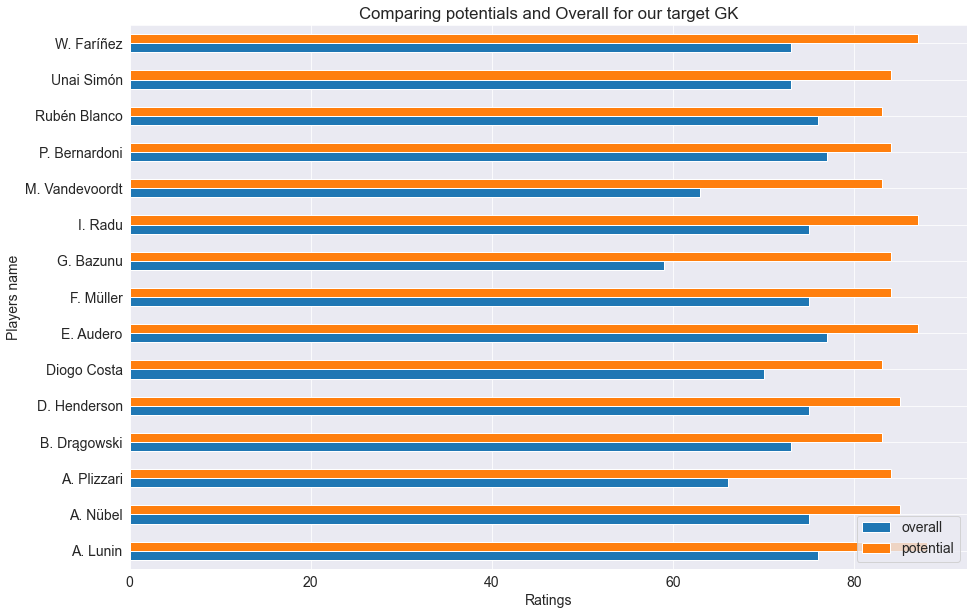

In [74]:
# let's visualize this 
trf_target_gk=trf_target_gk[['name', 'age', 'overall', 'potential', 'wage_eur', 'value_eur']]
trf_target_gk_15=trf_target_gk.sort_values('potential', ascending=False).head(15)
trf_target_gk_vis=trf_target_gk_15.groupby('name')[['overall', 'potential']].max()
trf_target_gk_vis.plot(kind='barh', figsize=(15,10));
plt.title('Comparing potentials and Overall for our target GK')
plt.xlabel('Ratings')
plt.ylabel('Players name')

From the plot we can see a list of Gks' we can purchase, give them the opportunity for optimal development and flip later on for a higher price
- Did you notice the stark difference in G.Bazunu current overall to his potential, also he is 17 years. Current value is 275,000
- Same with A.Plizzari and M. Vandevoordt
- Also another player is Diogo Costa from  with a good potential and current value of 2.7m. 
- Andriy Lunin looks like a player we can acquire, possibly on a loan moves if target deals falls thorugh.

Scouts will be on getting us more information on the transfer targets.

Re-building phase commences. 

In [81]:
## Coach requested he needs four good central mid-fielders below the ages 23, great potential and high work rate: 
# the work rate is imperative as it would suit coach intense pressing style.
scout_mid=players_df.loc[(players_df['player_positions']=='CM')&(players_df['potential']<=88) & (players_df['age']<=23)&
                                                       (players_df['value_eur']<=15000000)]

scout_mid=scout_mid[['name', 'age', 'height_cm', 'nationality','player_positions', 'overall', 'potential', 'club_name', 'league_name', 'value_eur', 'pace', 'work_rate']]
scout_mid.sort_values('potential', ascending=False).head(15)

,name,age,height_cm,nationality,player_positions,overall,potential,club_name,league_name,value_eur,pace,work_rate
4049,Riqui Puig,19,169,Spain,CM,71,87,FC Barcelona,Spain Primera Division,5000000,65.0,High/Medium
12255,E. Millot,16,175,France,CM,63,86,AS Monaco,French Ligue 1,800000,73.0,High/Medium
1010,Wendel,21,180,Brazil,CM,77,85,Sporting CP,Portuguese Liga ZON SAGRES,13000000,78.0,High/Medium
1280,Gedson Fernandes,20,181,Portugal,CM,76,85,SL Benfica,Portuguese Liga ZON SAGRES,12000000,79.0,High/High
9956,Marcos Antonio,19,168,Brazil,CM,65,85,Shakhtar Donetsk,Rest of World,1100000,72.0,Medium/Medium
12256,L. Agoume,17,185,France,CM,63,85,Inter,Italian Serie A,800000,65.0,Medium/Medium
2131,Aleix García,22,173,Spain,CM,74,85,Manchester City,English Premier League,9500000,67.0,Medium/Medium
2133,D. Sow,22,184,Switzerland,CM,74,85,Eintracht Frankfurt,German 1. Bundesliga,9500000,78.0,Medium/High
4784,A. Tchouaméni,19,185,France,CM,70,84,FC Girondins de Bordeaux,French Ligue 1,3800000,72.0,Medium/Medium
4055,I. Sissoko,21,193,France,CM,71,84,RC Strasbourg Alsace,French Ligue 1,4500000,51.0,Medium/High


From the list you can see young select among young players who you can groom and enhance their development for the team. 

Work rate, value of the players, I love Gedson Fernades, his current market value seems worth it, I doubt Benfica in Football Manager would want to sell at his market value. 

Would get a good bargain gunning for unknown players with low market value and great potential. 

What players do you pick guys?

Text(0, 0.5, 'Player Name')

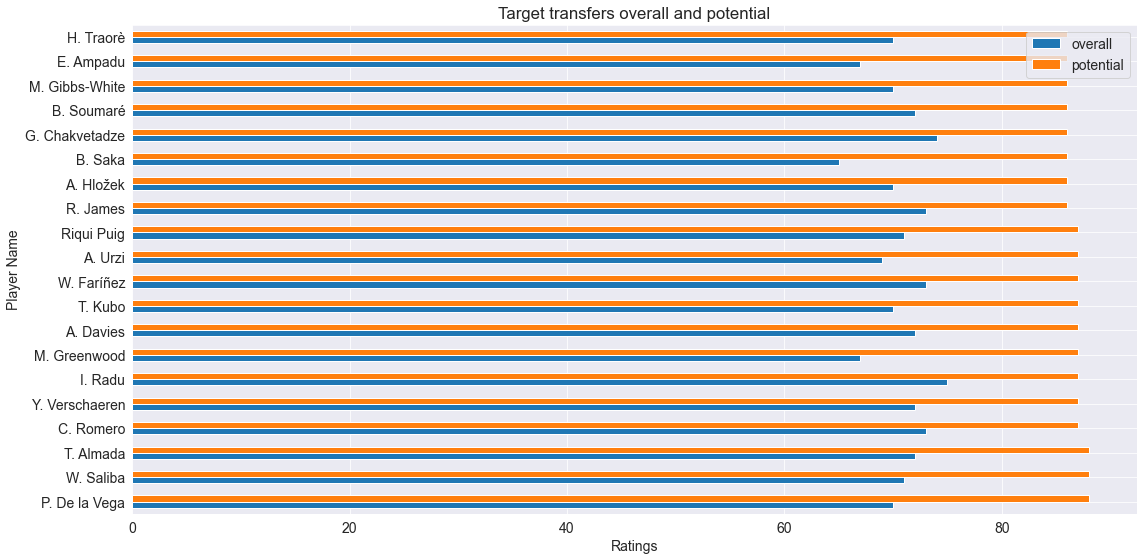

In [118]:
# Let's search for players in all position with great potential under or equal to age 23
trf_loan_trgt=players_df[['name', 'age', 'height_cm', 'nationality','player_positions', 'overall', 'potential', 'club_name', 'league_name', 'value_eur', 'pace', 'work_rate']]
trf_loan_trgt=trf_loan_trgt.loc[(trf_loan_trgt['potential']<=88) & (trf_loan_trgt['value_eur']<=10000000) & (trf_loan_trgt['age']<=23)]
trf_loan_trgt=trf_loan_trgt.groupby('name')[['overall','potential']].max()
trf_loan_trgt=trf_loan_trgt.sort_values('potential', ascending= False).head(20)
trf_loan_trgt.plot(kind='barh', figsize=(18,9));
plt.title('Target transfers overall and potential')
plt.xlabel('Ratings')
plt.ylabel('Player Name')

In [121]:
# Noting the owner is on Nigeria nationality, we were told to Nigerians under age 25 with great potentials to develop.
trf_loan_trgts=players_df[['name', 'age', 'height_cm', 'nationality','player_positions', 'overall', 'potential', 'club_name', 'league_name', 'value_eur', 'pace', 'work_rate']]
trf_trgt_NG=trf_loan_trgts.loc[(trf_loan_trgts['nationality']=='Nigeria')& (trf_loan_trgts['age']<=25)]
trf_trgt_NG.head(20)

,name,age,height_cm,nationality,player_positions,overall,potential,club_name,league_name,value_eur,pace,work_rate
351,W. Ndidi,22,183,Nigeria,"CDM, CM",81,84,Leicester City,English Premier League,20500000,71.0,Medium/High
608,A. Iwobi,23,185,Nigeria,"LM, LW, RM",79,84,Everton,English Premier League,17000000,80.0,High/Medium
763,H. Onyekuru,22,175,Nigeria,"LM, ST",78,86,AS Monaco,French Ligue 1,15500000,90.0,High/Low
1284,S. Chukwueze,20,172,Nigeria,"RM, CF, RW",76,85,Villarreal CF,Spain Primera Division,12000000,87.0,High/Medium
1640,O. Aina,22,182,Nigeria,"LM, RM, RB",75,84,Torino,Italian Serie A,10500000,87.0,Medium/Medium
1649,S. Kalu,21,176,Nigeria,"RM, RW",75,84,FC Girondins de Bordeaux,French Ligue 1,10500000,87.0,High/Medium
1661,E. Dennis,21,175,Nigeria,"RW, LW, ST",75,83,Club Brugge KV,Belgian Jupiler Pro League,10000000,92.0,Medium/Low
1664,K. Omeruo,25,185,Nigeria,CB,75,82,CD Leganés,Spain Primera Division,8500000,70.0,Low/Medium
1692,M. Simon,23,168,Nigeria,"LM, CF, RM",75,81,FC Nantes,French Ligue 1,9000000,92.0,Medium/Medium
1761,W. Troost-Ekong,25,191,Nigeria,CB,75,79,Udinese,Italian Serie A,7500000,65.0,Low/Medium


##### Which of the countries has the most valuable players?

We'll base count on market value greater or equal to 20million Eur 



<AxesSubplot:>

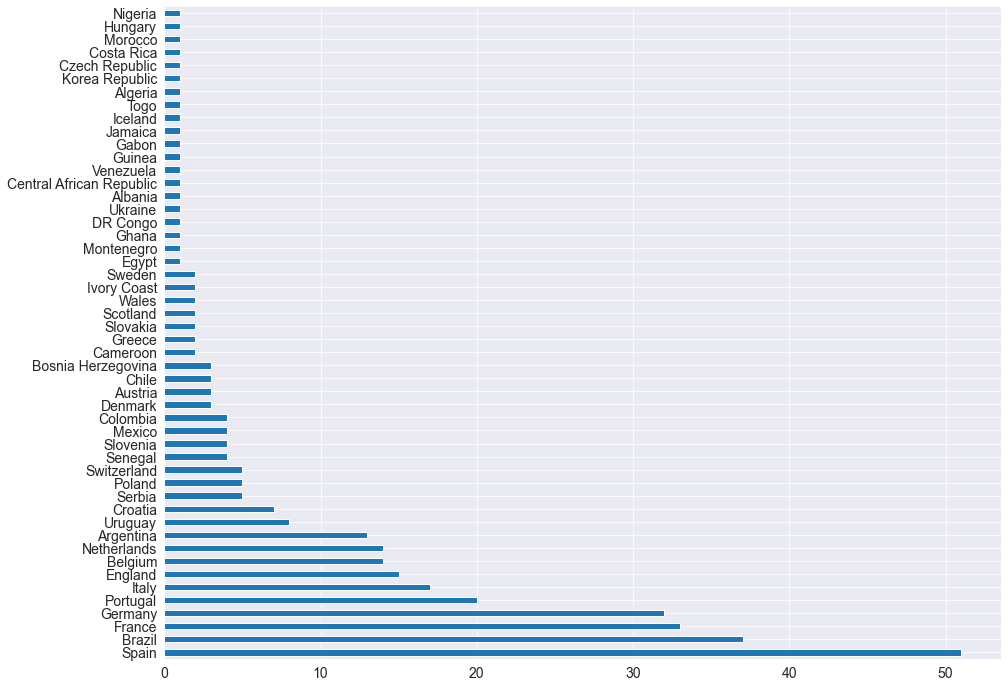

In [144]:
most_val_country=players_df[(players_df.value_eur>19000000)]
new_df=most_val_country['nationality'].value_counts()
new_df.plot(kind='barh',figsize=(15,12))

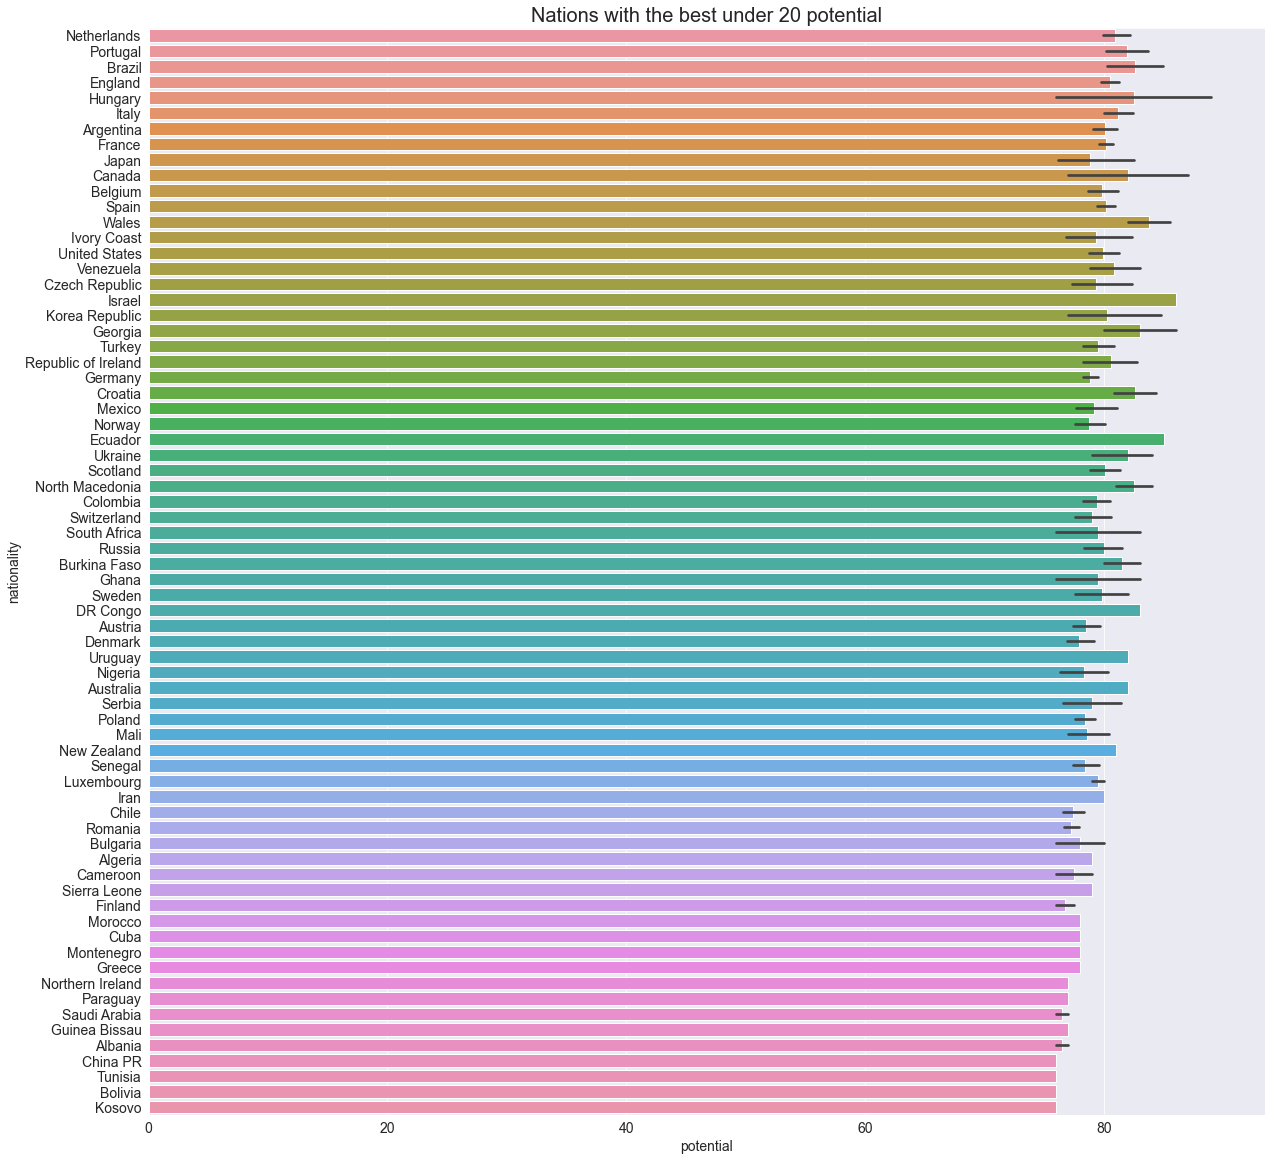

In [151]:
country_talent=players_df[(players_df.potential>75) & (players_df.age<20)]
country_talent=country_talent.sort_values('potential', ascending=False)
country_talent=country_talent[['name','nationality','potential']]
x_axis=country_talent['potential']
y_axis=country_talent['nationality']
plt.figure(figsize=(20,20))
sns.barplot(x=country_talent.potential, y=country_talent.nationality, data=country_talent)
plt.title('Nations with the best under 20 potential', fontsize=20)
plt.show()

We'll scout Netherland for young potentials for the team, prepare the batmobile for Amsterdam. 

##### Correlation between height and Pace?

C:\Users\HP\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


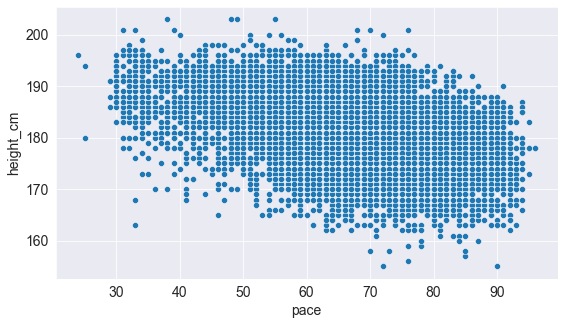

In [155]:
sns.scatterplot(players_df.pace,players_df.height_cm);

There's a correlation between hieght and pace, it seems shorter players tend to be quicker than taller ones. 

#### Correlation between weight and Stamina

C:\Users\HP\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


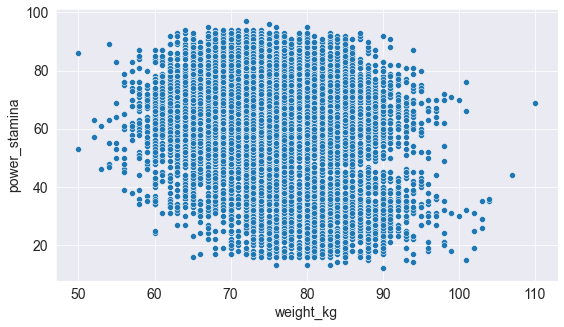

In [160]:
sns.scatterplot(players_df.weight_kg, players_df.power_stamina);

##### Correlation between age and Stamina

C:\Users\HP\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


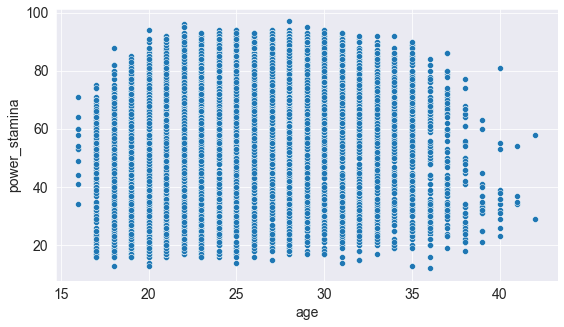

In [159]:
sns.scatterplot(players_df.age, players_df.power_stamina);

The plot shows a curve, youngsters players are susceptible to losing stamina, however as they age into their peak years their stamina increases, then proceeds to decline percipitiously as they transform to senior men. 

### What player_positions has the most valuable players?

In [168]:
merged_players_position=players_df.join(positions) # merge players with the position dataframe
value_position=merged_players_position.loc[merged_players_position['value_eur']>=20000000]
new_value_position=value_position.loc[:,'RW':'RWB']
new_value_position_totals=new_value_position.sum().sort_values(ascending=False)
new_value_position_totals.head(15)


CM     88
ST     69
CAM    60
CB     48
CDM    48
LW     41
RW     39
LM     36
RM     33
GK     30
CF     25
LB     18
RB     14
LWB     2
RWB     0
dtype: int64

Text(0.5, 0, 'count')

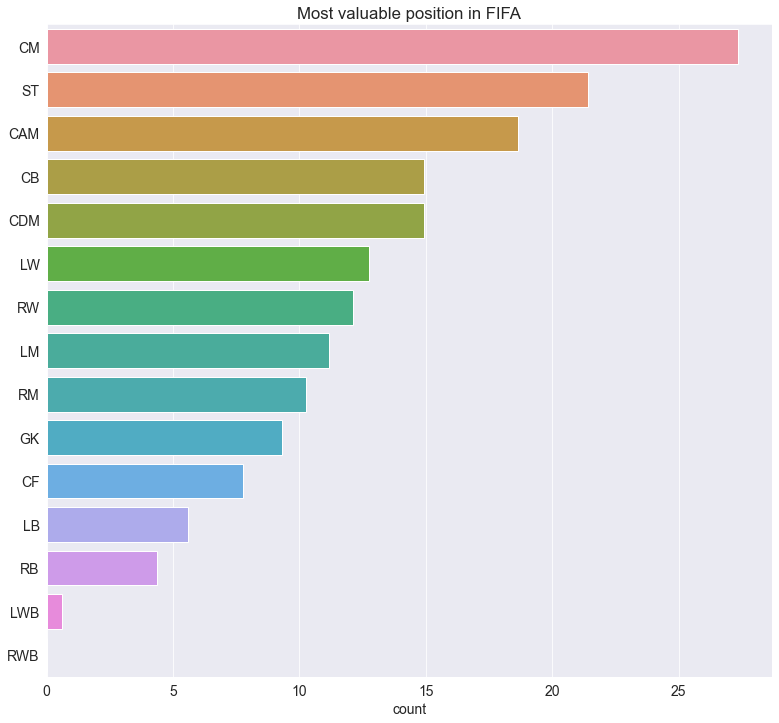

In [170]:
value_position_percent=new_value_position.mean().sort_values(ascending=False)*100
plt.figure(figsize=(13,12))
sns.barplot(x=value_position_percent, y=value_position_percent.index)
plt.title('Most valuable position in FIFA')
plt.xlabel('count')


Plot shows CM players are usually the most valuable, we can deduce the role CM plays as a link between defence and offence, having a good mid-field is important in build up play, conceding less goals-  good mid-fielders don't lose the ball in areas where defenders are susceptible to pressure.

They also aid in building the attack. Strikers are next, football is more about scoring goals than conceding goals. Teams are willing to pay more for strikers

So they club can invest more in developing great midfielders and Strikers. #Football business strategy 101

##### Follow me for more football advice. 

#### Inference and Conclusions